In [1]:
import torch
print(torch.__version__)  #注意是双下划线

1.11.0+cpu


In [36]:
# torch.Tensor()是Python类，更明确的说，是默认张量类型torch.FloatTensor()的别名，torch.Tensor([1,2]) 会调用Tensor类的构造函数__init__，生成单精度浮点类型的张量。
a=torch.Tensor([1,2])

In [40]:
print(a)
print(a.type())

a.requires_grad = True
print(a.requires_grad)


point = torch.ones(2,40)
print(point)

tensor([1., 2.])
torch.FloatTensor
True
tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]])


In [23]:
# torch.tensor()仅仅是Python的函数，函数原型是：
# torch.tensor(data, dtype=None, device=None, requires_grad=False)
# 其中data可以是：list, tuple, array, scalar等类型。
# torch.tensor()可以从data中的数据部分做拷贝（而不是直接引用），根据原始数据类型生成相应的torch.LongTensor，torch.FloatTensor，torch.DoubleTensor。
b=torch.tensor([1,2])

In [41]:
print(b)
print(b.type())
print(b.data[0].item())
print(b.data[0])

tensor([1, 2])
torch.LongTensor
1
tensor(1)


## 说明
w是Tensor(张量类型)

Tensor中包含data和grad，data和grad也是Tensor

grad初始为None，调用l.backward()方法后w.grad为Tensor，故更新w.data时需使用w.grad.data

如果w需要计算梯度，那构建的计算图中，跟w相关的tensor都默认需要计算梯度。

In [48]:
import torch
a = torch.tensor([1.0])
a.requires_grad = True # 或者 a.requires_grad_()
a = torch.tensor([1.0],requires_grad=True)   # only Tensors of floating point and complex dtype can require gradients，只有浮点和负数才需要梯度
print(a)
print(a.data)
print(a.data.requires_grad)  # 使用data属性时不会构建计算图，不会进行反向传播
print(a.data.item())   # 取值
print(a.type())             # a的类型是tensor
print(a.data.type())        # a.data的类型是tensor
print(a.grad)
print(type(a.grad))

tensor([1.], requires_grad=True)
tensor([1.])
False
1.0
torch.FloatTensor
torch.FloatTensor
None
<class 'NoneType'>


w是Tensor， forward函数的返回值也是Tensor，loss函数的返回值也是Tensor

本算法中反向传播主要体现在，l.backward()。调用该方法后w.grad由None更新为Tensor类型，且w.grad.data的值用于后续w.data的更新。

l.backward()会把计算图中所有需要梯度(grad)的地方都会求出来，然后把梯度都存在对应的待求的参数中，最终计算图被释放。

取tensor中的data是不会构建计算图的。 

predict (before training) 4 4.0
	grad: 1.0 2.0 -2.0
	grad: 2.0 4.0 -7.840000152587891
	grad: 3.0 6.0 -16.228801727294922
progress: 0 7.315943717956543
	grad: 1.0 2.0 -1.478623867034912
	grad: 2.0 4.0 -5.796205520629883
	grad: 3.0 6.0 -11.998146057128906
progress: 1 3.9987640380859375
	grad: 1.0 2.0 -1.0931644439697266
	grad: 2.0 4.0 -4.285204887390137
	grad: 3.0 6.0 -8.870372772216797
progress: 2 2.1856532096862793
	grad: 1.0 2.0 -0.8081896305084229
	grad: 2.0 4.0 -3.1681032180786133
	grad: 3.0 6.0 -6.557973861694336
progress: 3 1.1946394443511963
	grad: 1.0 2.0 -0.5975041389465332
	grad: 2.0 4.0 -2.3422164916992188
	grad: 3.0 6.0 -4.848389625549316
progress: 4 0.6529689431190491
	grad: 1.0 2.0 -0.4417421817779541
	grad: 2.0 4.0 -1.7316293716430664
	grad: 3.0 6.0 -3.58447265625
progress: 5 0.35690122842788696
	grad: 1.0 2.0 -0.3265852928161621
	grad: 2.0 4.0 -1.2802143096923828
	grad: 3.0 6.0 -2.650045394897461
progress: 6 0.195076122879982
	grad: 1.0 2.0 -0.24144840240478516
	grad: 2.

Text(0.5, 0, 'epoch')

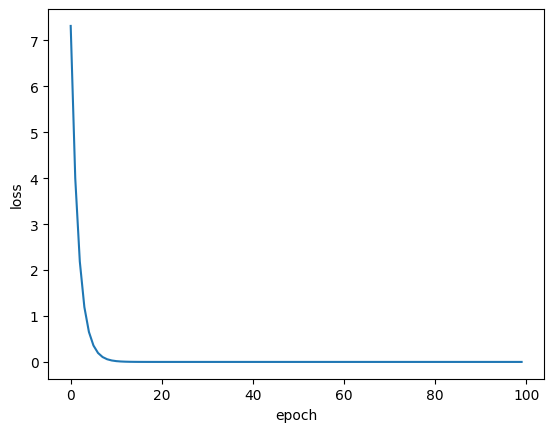

In [55]:
import torch
import matplotlib.pyplot as plt
x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]
 
w = torch.tensor([1.0]) # w的初值为1.0
w.requires_grad = True # 需要计算梯度
 
def forward(x):
    return x*w  # w是一个Tensor
 
def loss(x, y):
    y_pred = forward(x)
    return (y_pred - y)**2
 
print("predict (before training)", 4, forward(4).item())
 
loss_list = []
for epoch in range(100):
    l = loss(1,2)
    for x, y in zip(x_data, y_data):
        l =loss(x,y) # l是一个张量，tensor主要是在建立计算图 forward, compute the loss
        l.backward() #  backward,compute grad for Tensor whose requires_grad set to True
        print('\tgrad:', x, y, w.grad.item())
        w.data = w.data - 0.01 * w.grad.data   # 权重更新时，注意grad也是一个tensor,取data进行计算就不会产生计算图
 
        w.grad.data.zero_() # after update, remember set the grad to zero
 
    print('progress:', epoch, l.item()) # 取出loss使用l.item，不要直接使用l（l是tensor会构建计算图）
    loss_list.append(l.item())
 
print("predict (after training)", 4, forward(4).item())


print('Predict(after training)',4,forward(4).item())
plt.plot(range(100),loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')

画出二次模型y=w1x²+w2x+b，损失函数loss=(ŷ-y)²的计算图，并且手动推导反向传播的过程，最后用pytorch的代码实现。

反向传播计算图
https://img-blog.csdnimg.cn/20200323132806975.JPG?x-oss-process=image/watermark,type_ZmFuZ3poZW5naGVpdGk,shadow_10,text_aHR0cHM6Ly9ibG9nLmNzZG4ubmV0L3dlaXhpbl80NDg0MTY1Mg==,size_16,color_FFFFFF,t_70

Predict (befortraining) 4 tensor([21.], grad_fn=<AddBackward0>)
	grad: 1.0 2.0 2.0 2.0 2.0
	grad: 2.0 4.0 22.880001068115234 11.440000534057617 5.720000267028809
	grad: 3.0 6.0 77.04720306396484 25.682401657104492 8.560800552368164
Epoch: 0 18.321826934814453
	grad: 1.0 2.0 -1.1466078758239746 -1.1466078758239746 -1.1466078758239746
	grad: 2.0 4.0 -15.536651611328125 -7.7683258056640625 -3.8841629028320312
	grad: 3.0 6.0 -30.432214736938477 -10.144071578979492 -3.381357192993164
Epoch: 1 2.858394145965576
	grad: 1.0 2.0 0.3451242446899414 0.3451242446899414 0.3451242446899414
	grad: 2.0 4.0 2.4273414611816406 1.2136707305908203 0.6068353652954102
	grad: 3.0 6.0 19.449920654296875 6.483306884765625 2.161102294921875
Epoch: 2 1.1675907373428345
	grad: 1.0 2.0 -0.32242679595947266 -0.32242679595947266 -0.32242679595947266
	grad: 2.0 4.0 -5.845773696899414 -2.922886848449707 -1.4614434242248535
	grad: 3.0 6.0 -3.8828859329223633 -1.294295310974121 -0.43143177032470703
Epoch: 3 0.0465333424

Text(0.5, 0, 'epoch')

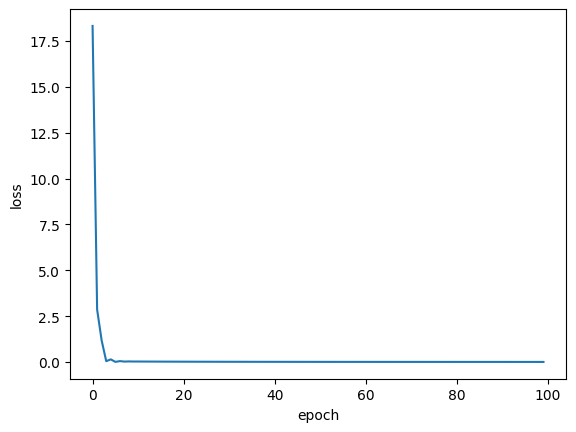

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import torch

x_data = [1.0,2.0,3.0]
y_data = [2.0,4.0,6.0]

w1 = torch.Tensor([1.0])#初始权值
w1.requires_grad = True#计算梯度，默认是不计算的
w2 = torch.Tensor([1.0])
w2.requires_grad = True
b = torch.Tensor([1.0])
b.requires_grad = True

def forward(x):
    return w1 * x**2 + w2 * x + b

def loss(x,y):#构建计算图
    y_pred = forward(x)
    return (y_pred-y) **2

print('Predict (befortraining)',4,forward(4))

loss_list = []

for epoch in range(100):
    l = loss(1, 2)#为了在for循环之前定义l,以便之后的输出，无实际意义
    for x,y in zip(x_data,y_data):
        l = loss(x, y)
        l.backward()
        print('\tgrad:',x,y,w1.grad.item(),w2.grad.item(),b.grad.item())
        w1.data = w1.data - 0.01*w1.grad.data #注意这里的grad是一个tensor，所以要取他的data
        w2.data = w2.data - 0.01 * w2.grad.data
        b.data = b.data - 0.01 * b.grad.data
        w1.grad.data.zero_() #释放之前计算的梯度
        w2.grad.data.zero_()
        b.grad.data.zero_()
    print('Epoch:',epoch,l.item())
    loss_list.append(l.item())

print('Predict(after training)',4,forward(4).item())
plt.plot(range(100),loss_list)
plt.ylabel('loss')
plt.xlabel('epoch')

总结与感悟：
在用y=w1x²+w2x+b的模型训练100次后可以看到当x=4时，y=8.5，与正确值8相差比较大。原因可能是数据集本身是一次函数的数据，模型是二次函数。所以模型本身就不适合这个数据集，所以才导致预测结果和正确值相差比较大的情况。
也可能是训练过拟合了，可能中间的某些值预测的更准